In [2]:
import pandas as pd

In [3]:
d1 = pd.read_csv('Housing.csv')

In [4]:
d1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [8]:
d1.bedrooms > 7000


0      False
1      False
2      False
3      False
4      False
       ...  
540    False
541    False
542    False
543    False
544    False
Name: bedrooms, Length: 545, dtype: bool

In [9]:
d1.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [10]:
d1.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [11]:
d1.isnull().sum().nunique()

1

In [13]:
d1.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
401,3500000,9500,3,1,2,yes,no,no,no,no,3,yes,unfurnished
349,3780000,4820,3,1,2,yes,no,no,no,no,0,no,semi-furnished
341,3850000,3180,2,2,1,yes,no,yes,no,no,2,no,semi-furnished
273,4340000,3500,4,1,2,yes,no,no,no,no,2,no,furnished
176,5250000,8520,3,1,1,yes,no,no,no,yes,2,no,furnished


In [14]:
d1.price

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [15]:
data = d1[['bedrooms','area']]
data

,bedrooms,area
0,4,7420
1,4,8960
2,3,9960
3,4,7500
4,4,7420
...,...,...
540,2,3000
541,3,2400
542,2,3620
543,3,2910


In [16]:
data  = d1[['furnishingstatus', 'parking', 'area']]
data

,furnishingstatus,parking,area
0,furnished,2,7420
1,furnished,3,8960
2,semi-furnished,2,9960
3,furnished,3,7500
4,furnished,2,7420
...,...,...,...
540,unfurnished,2,3000
541,semi-furnished,0,2400
542,unfurnished,0,3620
543,furnished,0,2910


In [17]:
data.sample(7)

,furnishingstatus,parking,area
340,semi-furnished,0,5300
349,semi-furnished,0,4820
297,unfurnished,0,3640
477,unfurnished,0,4960
378,semi-furnished,0,2275
37,furnished,2,9000
176,furnished,2,8520


In [19]:
data.sort_values('area')

,furnishingstatus,parking,area
449,unfurnished,0,1650
537,unfurnished,0,1700
527,semi-furnished,0,1836
271,semi-furnished,0,1905
413,unfurnished,0,1950
...,...,...,...
403,unfurnished,0,12944
10,furnished,2,13200
66,furnished,1,13200
125,semi-furnished,2,15600


In [23]:
data.sort_index().head().count()

furnishingstatus    5
parking             5
area                5
dtype: int64

In [26]:
data.area

0      7420
1      8960
2      9960
3      7500
4      7420
       ... 
540    3000
541    2400
542    3620
543    2910
544    3850
Name: area, Length: 545, dtype: int64

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

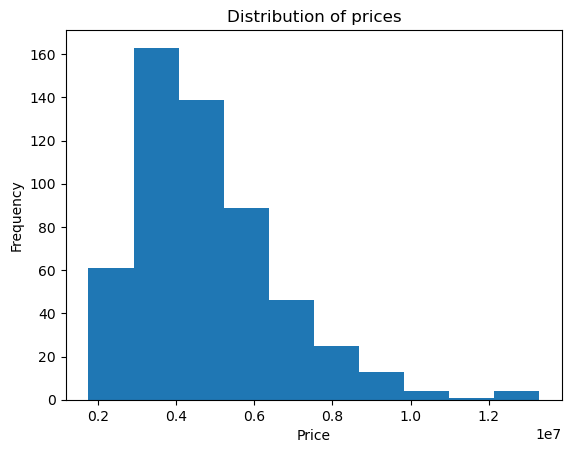

In [37]:
plt.hist(d1['price'])
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of prices')
plt.show()

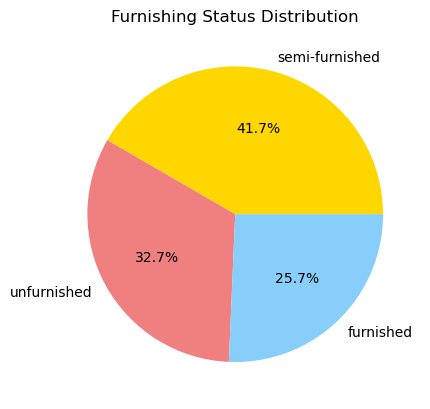

In [39]:
furnishing_counts = d1['furnishingstatus'].value_counts()
plt.pie(furnishing_counts, labels=furnishing_counts.index, autopct='%1.1f%%', colors=['gold', 'lightcoral', 'lightskyblue'])
plt.title('Furnishing Status Distribution')
plt.show()

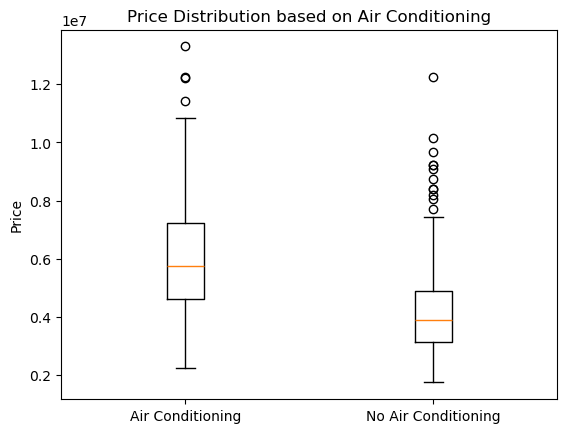

In [40]:
plt.boxplot([d1[d1['airconditioning'] == 'yes']['price'], d1[d1['airconditioning'] == 'no']['price']], labels=['Air Conditioning', 'No Air Conditioning'])
plt.ylabel('Price')
plt.title('Price Distribution based on Air Conditioning')
plt.show()

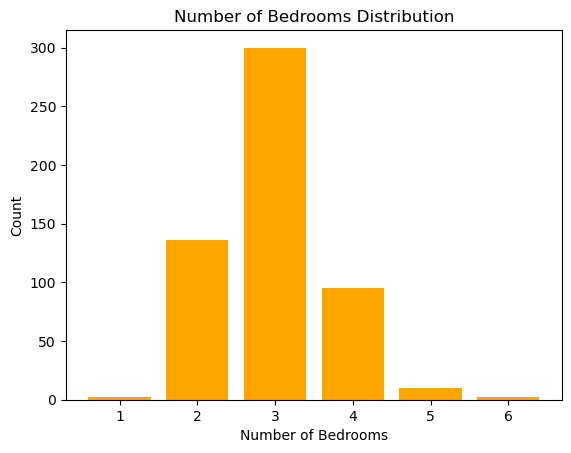

In [41]:
# Bar plot of number of bedrooms
bedroom_counts = d1['bedrooms'].value_counts()
plt.bar(bedroom_counts.index, bedroom_counts.values, color='orange')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.title('Number of Bedrooms Distribution')
plt.show()